In [ ]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df.drop('Time', inplace= True, axis=1)

In [ ]:
df.drop('Class', inplace= True, axis=1)

In [ ]:
array= df['Class']

In [ ]:
# Standardize data
scaler = StandardScaler() 
scaled_data = scaler.fit_transform(df)
  
# Normalizing the Data 
normalized_data = normalize(scaled_data) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_data = pd.DataFrame(normalized_data) 
  
# Reducing the dimensions of the data 
#pca = PCA(n_components = 2) 
#X_principal = pca.fit_transform(normalized_df) 
#X_principal = pd.DataFrame(X_principal) 
#X_principal.columns = ['P1', 'P2'] 
  
#X_principal.head(2)

In [ ]:
normalized_data['Class']= array

In [ ]:
normalized_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,-0.217414,-0.013803,0.523858,0.304826,-0.076763,0.108690,0.060654,0.025879,0.103698,0.026114,-0.169238,-0.193630,-0.311946,-0.101657,0.502325,-0.168119,0.076683,0.009636,0.155419,0.102130,-0.007805,0.119898,-0.055403,0.034607,0.077223,-0.122815,0.103624,-0.019974,0.076715
1,0.232198,0.061504,0.041898,0.120783,0.016593,-0.023590,-0.024308,0.027190,-0.088718,-0.058517,0.602919,0.406813,0.187522,-0.057232,0.264964,0.202029,-0.051580,-0.083478,-0.068338,-0.034195,-0.117293,-0.335832,0.061895,-0.214124,0.122375,0.099622,-0.008493,0.017022,-0.130686
2,-0.107325,-0.125598,0.180984,0.041511,-0.056420,0.209148,0.099010,0.032093,-0.213361,0.029512,0.094685,0.010235,0.111534,-0.026791,0.396629,-0.510427,0.202248,-0.022407,-0.430004,0.105386,0.052251,0.164563,0.225377,-0.176128,-0.097271,-0.044639,-0.021223,-0.028014,0.179625
3,-0.107054,-0.024341,0.256613,-0.132314,-0.001621,0.203150,0.041680,0.068578,-0.273970,-0.010952,-0.048152,0.038707,0.110709,-0.065180,-0.149698,-0.262424,-0.174786,0.508944,-0.328591,-0.058560,-0.031996,0.001577,-0.066138,-0.421213,0.269500,-0.099870,0.033722,0.040404,0.030497
4,-0.169214,0.152105,0.292285,0.081456,-0.084421,0.020603,0.137156,-0.064818,0.212995,0.197914,-0.230685,0.154132,0.386956,-0.334242,0.054749,-0.147430,-0.079861,-0.013040,0.282449,0.151646,-0.003674,0.314777,-0.062990,0.066746,-0.113090,0.298065,0.155561,0.186522,-0.021005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-0.363175,0.365177,-0.388345,-0.087392,-0.232699,-0.117151,-0.238029,0.366212,0.104331,0.239531,-0.093447,0.162500,-0.041463,0.288991,-0.060470,0.075682,0.140400,0.036475,-0.050228,0.114617,0.017399,0.009229,0.097267,-0.050352,0.165027,0.031044,0.139975,0.149413,-0.020964
284803,-0.079909,-0.007124,0.286668,-0.111419,0.134357,0.169686,0.004201,0.052732,0.113694,-0.191439,-0.031428,0.195763,0.260692,-0.150433,0.271838,-0.173494,-0.006461,-0.311190,-0.405527,0.016517,0.062288,0.272067,0.004263,-0.358387,-0.248560,-0.175068,0.036234,-0.034637,-0.054277
284804,0.214081,-0.039852,-0.468171,-0.086064,0.416319,0.497018,-0.052413,0.129568,0.085986,-0.097257,0.088090,0.013799,-0.040319,-0.116356,0.317240,0.035080,0.080631,0.103115,-0.154903,0.000396,0.069009,0.174054,-0.013118,0.230883,0.111362,-0.039578,0.002411,-0.017578,-0.017877
284805,-0.021802,0.057056,0.082288,0.086528,-0.048635,0.083147,-0.098513,0.100992,0.063385,-0.065103,-0.336494,-0.171151,-0.185959,0.083305,0.380812,-0.123351,0.106632,0.236048,0.632248,0.029358,0.064136,0.195802,-0.046444,0.036130,-0.193920,0.201340,0.047883,0.056245,-0.055635


In [ ]:
df  = pd.read_csv("/content/gdrive/MyDrive/creditcard.csv")

In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
import numpy as np
from numpy.linalg import norm


class Kmeans:
  

    def __init__(self, n_clusters, max_iter=100, random_state=123):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def initializ_centroids(self, X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids

    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)

    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    def fit(self, X):
        self.centroids = self.initializ_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)
    
    def predict(self, X):
        distance = self.compute_distance(X, centroids)
        return self.find_closest_cluster(distance)
    
    def ret_old_centre(self,X):
      return old_centroids

In [ ]:
import pandas as pd
from sklearn import preprocessing

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)


In [ ]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles,
                                                make_moons)
#from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
X_std = StandardScaler().fit_transform(normalized_data)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
df_predicted = km.predict(df)

NameError: ignored

In [ ]:
arr = np.array(df_predicted)


In [ ]:
import math
 
def dotproduct(v1, v2):
  return sum((a*b) for a, b in zip(v1, v2))
 
def length(v):
  return math.sqrt(dotproduct(v, v))
 
def angle(v1, v2):
  return math.acos(dotproduct(v1, v2) / (length(v1) * length(v2)))

In [ ]:

 
list_centroids=[]
list_csize= []
K= 4
for i in range(2,K+1,1):
  km= Kmeans(i,100,123)
  km.fit(X_std)
  centroids = km.centroids
  df_predicted= km.predict(X_std)
  arr = np.array(df_predicted)
  list1= []
  list2= []
  list3= []
  for j in range(0,i,1):
    count = np.count_nonzero(arr == j)
    list1.append(count)
 
  for j in range(0,len(df),1):
    
    list2.append(list1[df_predicted[j]])
    list3.append(centroids[df_predicted[j]])
  print(i)
  list_centroids.append(list3)
  list_csize.append(list2)

2
3
4


In [ ]:
a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

with tf.device('/TPU:0'):
  c = tf.matmul(a, b)

print("c device: ", c.device)
print(c)

c device:  /job:worker/replica:0/task:0/device:TPU:0
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [ ]:
import tensorflow as tf

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='')
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

INFO:tensorflow:Initializing the TPU system: grpc://10.33.193.154:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.33.193.154:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU')]


In [ ]:
avgsimscore=[]
for i in range(0,len(df),1):
  upper=0
  lower=0
  for j in range(0,K-1,1):
    for l in range(j+1,K-1,1):
      lower= lower+ list_csize[j][i]+ list_csize[l][i]
      k= angle(list_centroids[j][i], list_centroids[l][i])
      if (k <= (3.14/2)):
        upper= upper+ (list_csize[j][i]+ list_csize[l][i])*(abs(math.cos(k)))
      else:
        upper= upper+ (list_csize[j][i]+ list_csize[l][i])*(abs(math.cos(3.14- k)))
  
  print(i)
  avgsimscore.append(upper/lower)

  print(avgsimscore[i])


Streaming output truncated to the last 5000 lines.
282307
0.6852362763509918
282308
0.6852362763509918
282309
0.8485933259571047
282310
0.6852362763509918
282311
0.5126236070149209
282312
0.8485933259571047
282313
0.5733390659469616
282314
0.5126236070149209
282315
0.8485933259571047
282316
0.8728990715659131
282317
0.4180607793828803
282318
0.4180607793828803
282319
0.5126236070149209
282320
0.8728990715659131
282321
0.8728990715659131
282322
0.6852362763509918
282323
0.5126236070149209
282324
0.8728990715659131
282325
0.6852362763509918
282326
0.4180607793828803
282327
0.8485933259571047
282328
0.8728990715659131
282329
0.8728990715659131
282330
0.8485933259571047
282331
0.6852362763509918
282332
0.8485933259571047
282333
0.8485933259571047
282334
0.8728990715659131
282335
0.6852362763509918
282336
0.8728990715659131
282337
0.8728990715659131
282338
0.6852362763509918
282339
0.8485933259571047
282340
0.8485933259571047
282341
0.8728990715659131
282342
0.8485933259571047
282343
0.6852

In [ ]:
avgsimscore

[0.4882247470942482,
 0.6501879952838749,
 0.3170034452511284,
 0.38952017705351966,
 0.6659299613188141,
 0.7402580985007208,
 0.570285848038553,
 0.5523761059435279,
 0.2799514373331653,
 0.7402580985007208,
 0.5446992868146354,
 0.2799514373331653,
 0.5446992868146354,
 0.570285848038553,
 0.4486876150891725,
 0.38658214186810747,
 0.610646940231832,
 0.7402580985007208,
 0.4384823527611832,
 0.5446992868146354,
 0.3686009101723598,
 0.570285848038553,
 0.570285848038553,
 0.5374186376207531,
 0.2760379754448411,
 0.7402580985007208,
 0.570285848038553,
 0.39069032852524516,
 0.6634004503868138,
 0.610646940231832,
 0.6501879952838749,
 0.570285848038553,
 0.5523761059435279,
 0.5523761059435279,
 0.5523761059435279,
 0.5523761059435279,
 0.4997426440479683,
 0.6634004503868138,
 0.610646940231832,
 0.570285848038553,
 0.2707933735310005,
 0.6659299613188141,
 0.6634004503868138,
 0.4697948485558537,
 0.4442145542967468,
 0.6501879952838749,
 0.6844807894109438,
 0.5915587907212112,

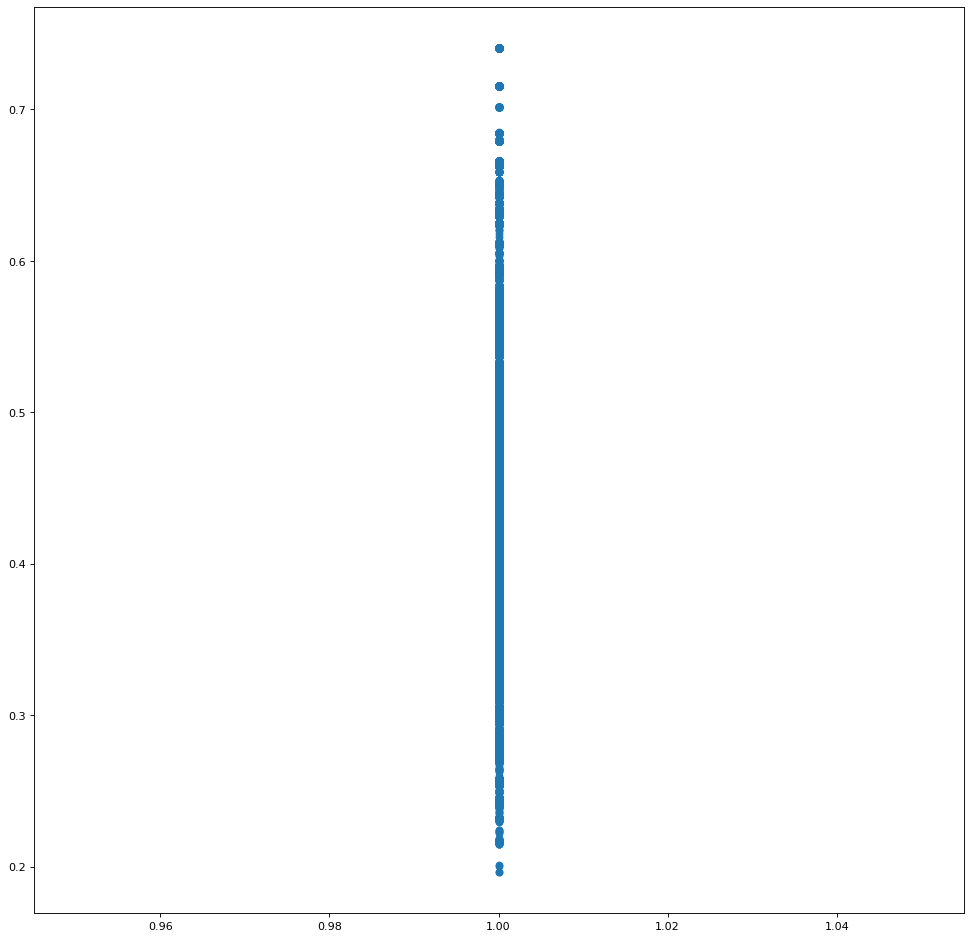

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# if using a Jupyter notebook, include:
%matplotlib inline
ones = []
for i in range(len(avgsimscore)):
    ones.append(1)
plt.figure(figsize=(15, 15), dpi=80)
plt.scatter(ones,avgsimscore)
plt.show()

In [ ]:
import sklearn.metrics

auprc = sklearn.metrics.average_precision_score(array[:len(avgsimscore)], listans)


In [ ]:
auprc

0.0029206541068016274

In [ ]:
count=0
kkf = 0
listans=[0]*len(avgsimscore)
for i in range(0,len(avgsimscore),1):
  if(array[i]==1 and avgsimscore[i]<=0.6):
    kkf= kkf+1
  if(avgsimscore[i]<=0.6):
    count= count+1
    listans[i]=1
 


In [ ]:
kkf

139

In [ ]:
df.index[0]

0

In [ ]:
accuracy = (count/kkf)*100

In [ ]:
accuracy

92.27642276422763

In [ ]:
count

35